# Violation of Baccari et al.'s Bell inequality for path graphs from size 2 to 57 on IBM Quantum Brooklyn

In [1]:
import sys
import numpy as np
import pickle

In [2]:
from qiskit import Aer, IBMQ

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')
device = provider.backend.ibm_washington

In [4]:
sys.path.append("../../libs_bell/")
import importlib
import lib_preprocessing
importlib.reload(lib_preprocessing)
from lib_preprocessing import *

In [5]:
file_path = "pkls/job_ids_20220312_200952.pkl"
raw_hist_list, results_meas_cal = job_ids_to_raw_hist_list_and_results_meas_cal(file_path, device)
print("length of raw_hist_list: ", len(raw_hist_list))
print("length of results_meas_cal: ", len(results_meas_cal))

length of results_jobs_list:  1
length of results_list:  264
length of results_meas_cal:  66
length of raw_hist_list:  132
length of raw_hist_list:  132
length of results_meas_cal:  66


In [6]:
with open("pkls/raw_hist_list.pkl", "wb") as f:
    pickle.dump(raw_hist_list, f)
with open("pkls/results_meas_cal.pkl", "wb") as f:
    pickle.dump(results_meas_cal, f)

# Device Properties

In [5]:
file_path = "pkls/job_ids_20220312_200952.pkl"
with open(file_path, "rb") as f:
    job_ids = pickle.load(f)
job = provider.get_backend("ibm_washington").retrieve_job(job_ids[0])
device_property = job.properties()

In [6]:
import pandas as pd
pd.set_option('display.max_rows', None)
device_property.backend_name

'ibm_washington'

In [7]:
prop_dict = device_property.to_dict()

In [8]:
df_gates = pd.DataFrame(prop_dict["gates"])

In [10]:
for i in range(len(df_gates["parameters"])):
    if df_gates["gate"][i] == "sx":
        print(df_gates["qubits"][i], df_gates["gate"][i], df_gates["parameters"][i][0]["value"])

[0] sx 0.0002081722705572143
[1] sx 0.00026561516138256353
[2] sx 0.00023235185857847782
[3] sx 0.0006704555968050982
[4] sx 0.0012468078742030398
[5] sx 0.0004231850455645456
[6] sx 0.00030197969756846937
[7] sx 0.00038534302027595893
[8] sx 0.00028867626626780677
[9] sx 0.00782300761676381
[10] sx 0.003813046245531338
[11] sx 0.0017913870356094917
[12] sx 0.0016169972964484606
[13] sx 0.0004062026755085873
[14] sx 0.00025841830066432043
[15] sx 0.000935318475289148
[16] sx 0.0001916018825606364
[17] sx 0.00039088740419934075
[18] sx 0.00015089526099717804
[19] sx 0.00022119921460781497
[20] sx 0.00028280070616105036
[21] sx 0.0011227785554225622
[22] sx 0.001658656369080585
[23] sx 0.0005654292467045916
[24] sx 0.0011201451983828808
[25] sx 0.0002080037136797252
[26] sx 0.0001729299897342938
[27] sx 0.00023707128760040995
[28] sx 0.0002794162643190069
[29] sx 0.00027632117899879186
[30] sx 0.00030333266644094395
[31] sx 0.00031156072826539624
[32] sx 0.00029064754735653596
[33] sx 0.

In [11]:
df_qubits = pd.DataFrame(prop_dict["qubits"])

In [13]:
prop_qubits = [dict() for _ in range(127)]
for i in range(127):
    prop_qubits[i]["T1"] = prop_dict["qubits"][i][0]["value"]
    prop_qubits[i]["T2"] = prop_dict["qubits"][i][1]["value"]
    prop_qubits[i]["frequency"] = prop_dict["qubits"][i][2]["value"]
    prop_qubits[i]["anharmonicity"] = prop_dict["qubits"][i][3]["value"]
    prop_qubits[i]["readout_error"] = prop_dict["qubits"][i][4]["value"]
    prop_qubits[i]["prob_meas0_prep1"] = prop_dict["qubits"][i][5]["value"]
    prop_qubits[i]["prob_meas1_prep0"] = prop_dict["qubits"][i][6]["value"]
    prop_qubits[i]["readout_length"] = prop_dict["qubits"][i][7]["value"]

In [18]:
error_list = [[] for _ in range(8)]
for i in range(127):
    t1, t2, freq, anhar, re, p01, p10, rel = prop_qubits[i].values()
    error_list[0].append(t1)
    error_list[1].append(t2)
    error_list[2].append(freq)
    error_list[3].append(anhar)
    error_list[4].append(re)
    error_list[5].append(p01)
    error_list[6].append(p10)
    error_list[7].append(rel)
    print(str(i) + r" & "\
          + "{:.3f}".format(t1) + r" & "\
          + "{:.3f}".format(t2) + r" & "\
          + "{:.3f}".format(freq) + r" & "\
          + "{:.3f}".format(anhar) + r" & "\
          + "{:.3f}".format(re) + r" & "\
          + "{:.3f}".format(p01) + r" & "\
          + "{:.3f}".format(p10) + r" & "\
          + "{:.3f}".format(rel) + r" \\")

0 & 110.450 & 11.992 & 5.088 & -0.308 & 0.109 & 0.090 & 0.127 & 864.000 \\
1 & 127.233 & 91.805 & 4.981 & -0.309 & 0.006 & 0.007 & 0.006 & 864.000 \\
2 & 69.171 & 49.721 & 4.892 & -0.310 & 0.017 & 0.019 & 0.014 & 864.000 \\
3 & 111.869 & 31.395 & 4.945 & -0.277 & 0.043 & 0.046 & 0.041 & 864.000 \\
4 & 120.323 & 96.923 & 4.984 & -0.322 & 0.100 & 0.085 & 0.115 & 864.000 \\
5 & 111.716 & 169.257 & 4.882 & -0.310 & 0.051 & 0.051 & 0.051 & 864.000 \\
6 & 81.633 & 138.511 & 4.969 & -0.308 & 0.007 & 0.008 & 0.006 & 864.000 \\
7 & 84.981 & 57.582 & 5.015 & -0.308 & 0.014 & 0.017 & 0.010 & 864.000 \\
8 & 111.190 & 127.577 & 5.111 & -0.307 & 0.011 & 0.011 & 0.012 & 864.000 \\
9 & 121.205 & 153.301 & 4.970 & -0.309 & 0.104 & 0.106 & 0.101 & 864.000 \\
10 & 94.591 & 116.836 & 4.876 & -0.310 & 0.066 & 0.080 & 0.052 & 864.000 \\
11 & 150.020 & 60.204 & 5.127 & -0.307 & 0.127 & 0.105 & 0.149 & 864.000 \\
12 & 149.695 & 123.737 & 4.830 & -0.311 & 0.250 & 0.247 & 0.253 & 864.000 \\
13 & 78.284 & 14.544

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '$\\mu s$')

<Figure size 432x288 with 0 Axes>

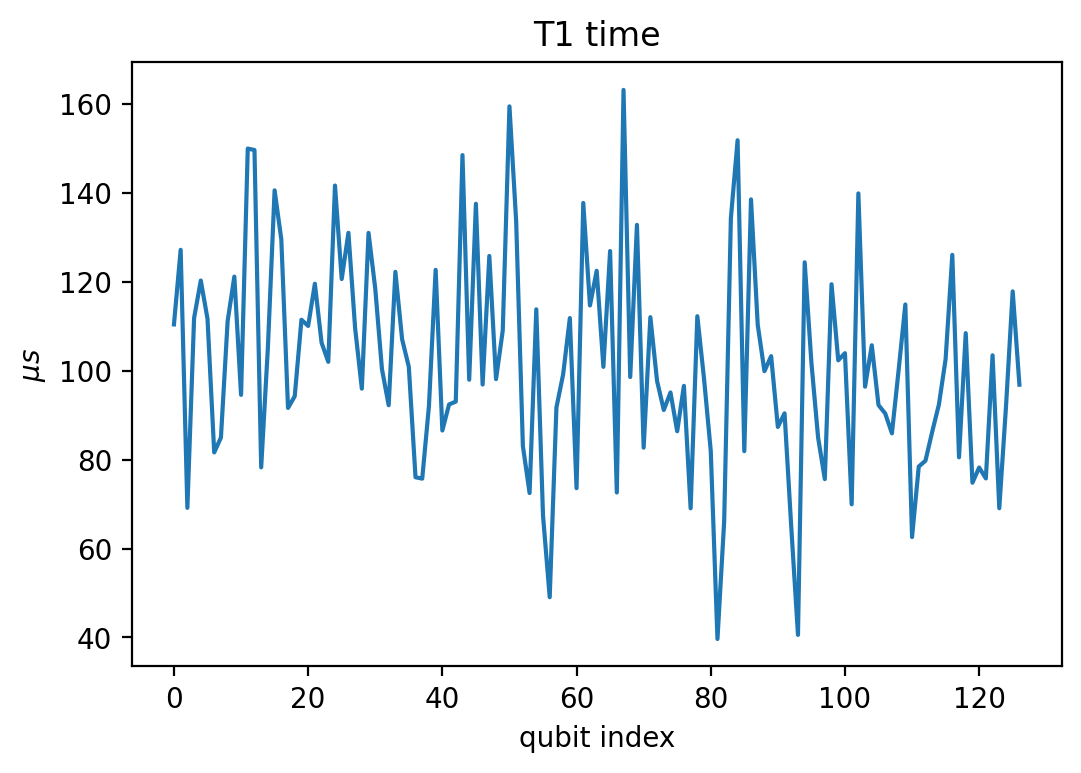

In [36]:
plt.clf()
plt.figure(dpi=200)
plt.plot(error_list[0], label="t1")
plt.title("T1 time")
plt.xlabel("qubit index")
plt.ylabel(r"$\mu s$")

Text(0, 0.5, '$\\mu s$')

<Figure size 432x288 with 0 Axes>

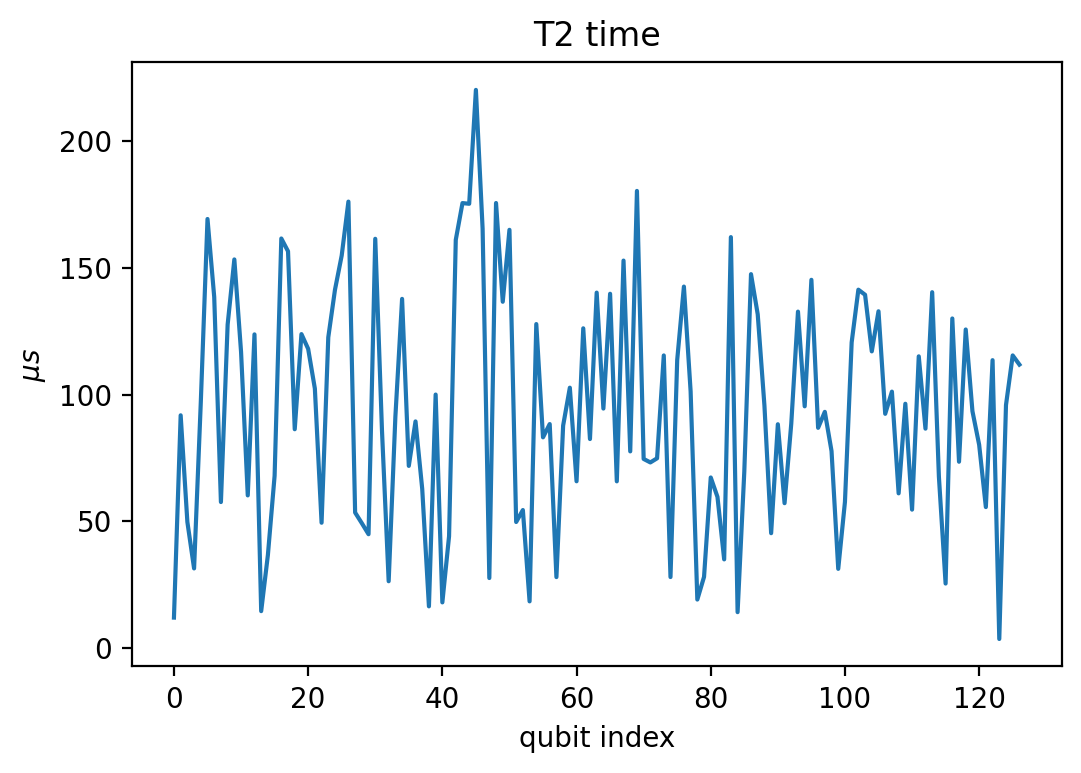

In [38]:
plt.clf()
plt.figure(dpi=200)
plt.plot(error_list[1], label="t2")
plt.title("T2 time")
plt.xlabel("qubit index")
plt.ylabel(r"$\mu s$")

Text(0, 0.5, 'GHz')

<Figure size 432x288 with 0 Axes>

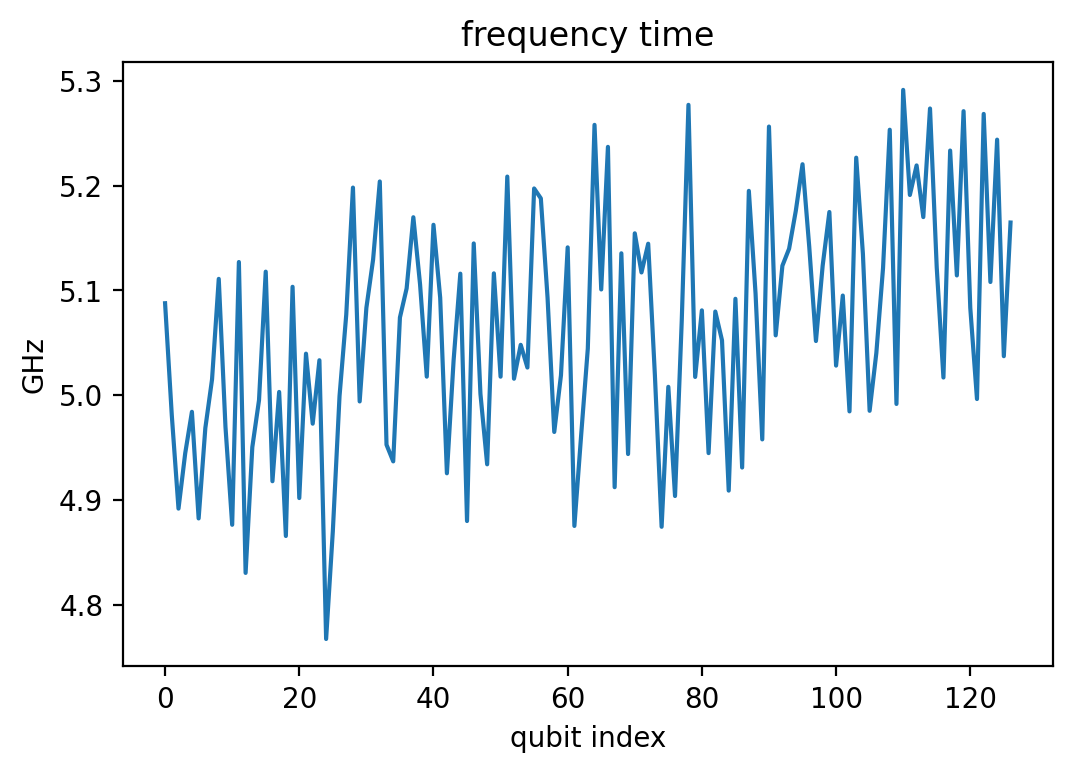

In [39]:
plt.clf()
plt.figure(dpi=200)
plt.plot(error_list[2], label="freq")
plt.title("frequency time")
plt.xlabel("qubit index")
plt.ylabel(r"GHz")

Text(0, 0.5, 'GHz')

<Figure size 432x288 with 0 Axes>

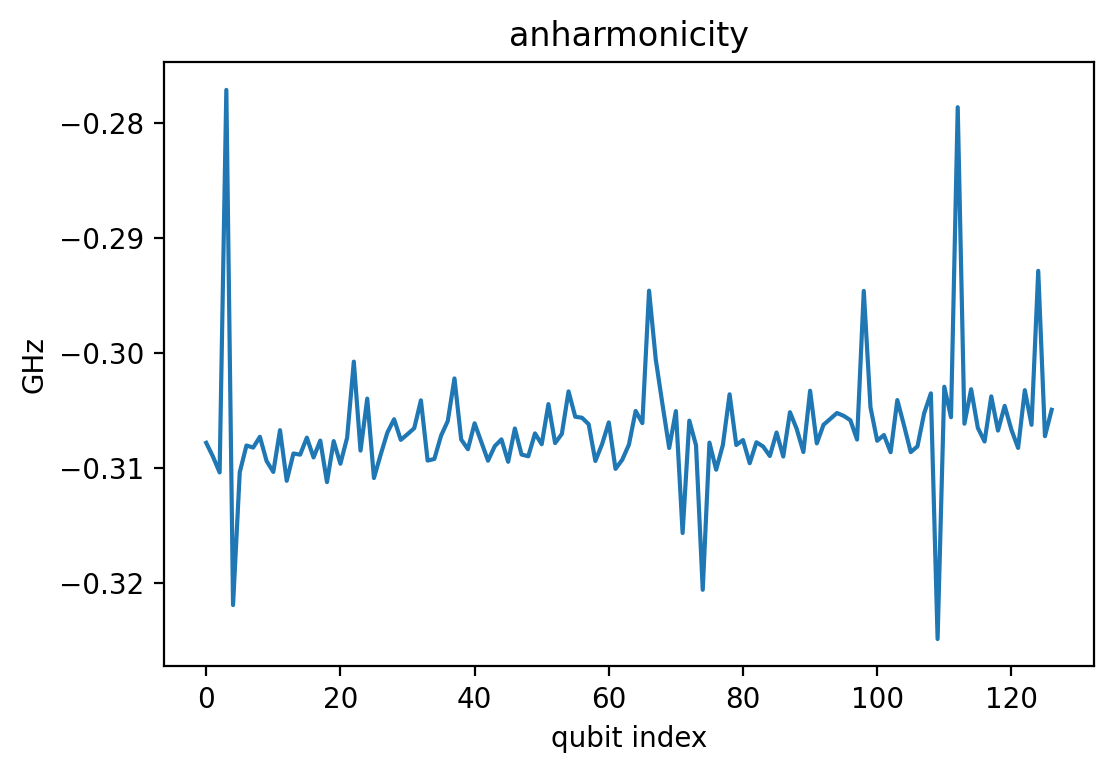

In [40]:
plt.clf()
plt.figure(dpi=200)
plt.plot(error_list[3], label="anhar")
plt.title("anharmonicity")
plt.xlabel("qubit index")
plt.ylabel(r"GHz")

Text(0, 0.5, 'probability')

<Figure size 432x288 with 0 Axes>

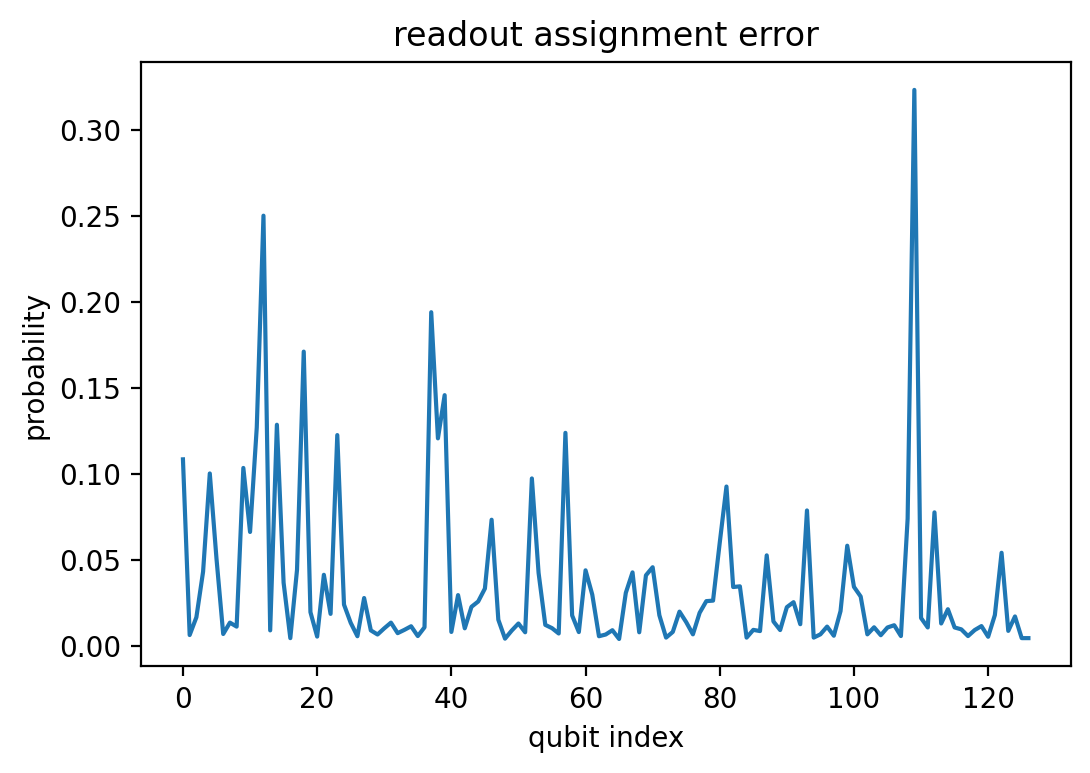

In [41]:
plt.clf()
plt.figure(dpi=200)
plt.plot(error_list[4], label="re")
plt.title("readout assignment error")
plt.xlabel("qubit index")
plt.ylabel(r"probability")

Text(0.5, 1.0, 'probability of readout p(0|1)')

<Figure size 432x288 with 0 Axes>

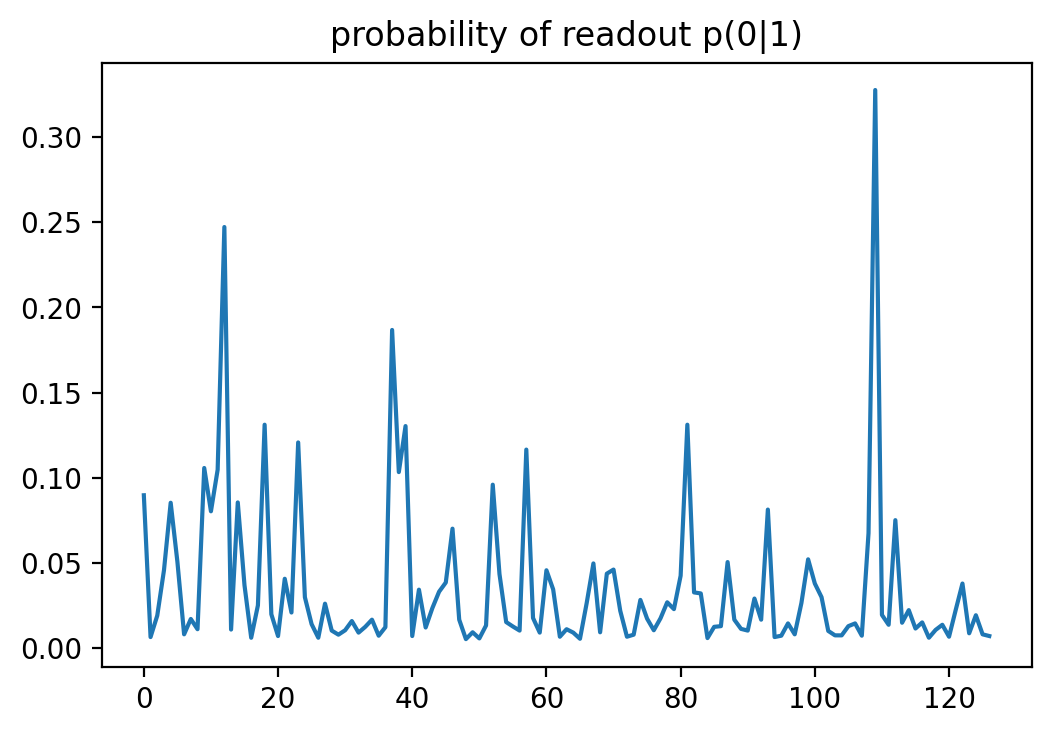

In [26]:
plt.clf()
plt.figure(dpi=200)
plt.plot(error_list[5], label="p01")
plt.title("probability of readout p(0|1)")

Text(0.5, 1.0, 'probability of readout p(1|0)')

<Figure size 432x288 with 0 Axes>

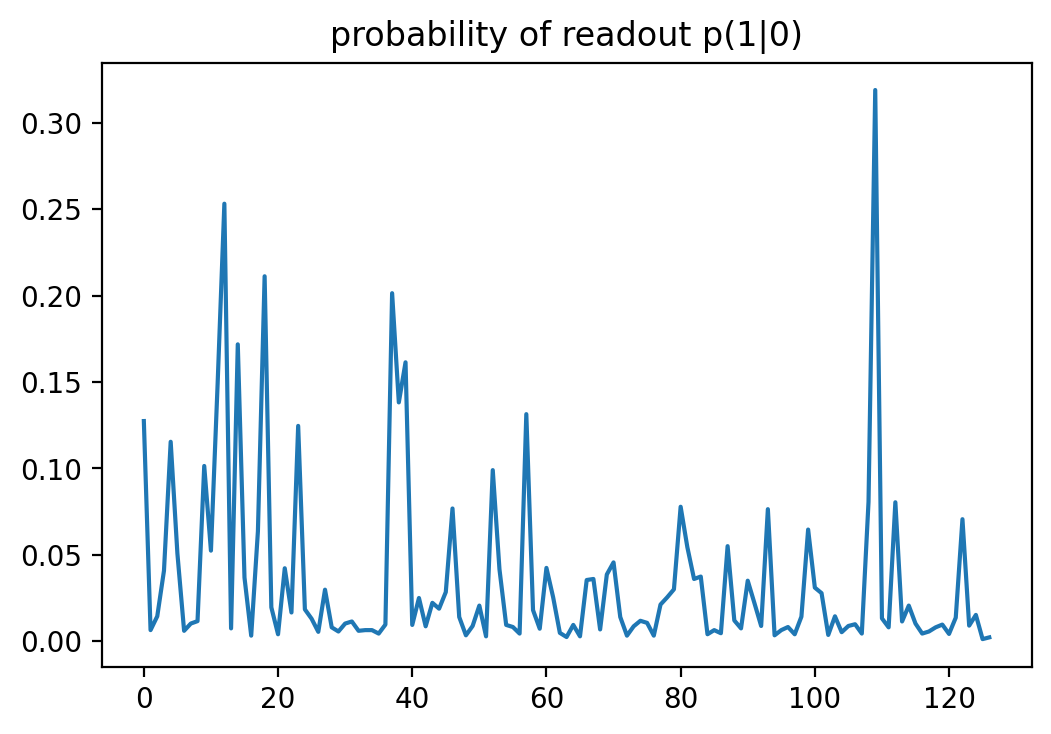

In [27]:
plt.clf()
plt.figure(dpi=200)
plt.plot(error_list[6], label="p10")
plt.title("probability of readout p(1|0)")

Text(0.5, 1.0, 'readout length')

<Figure size 432x288 with 0 Axes>

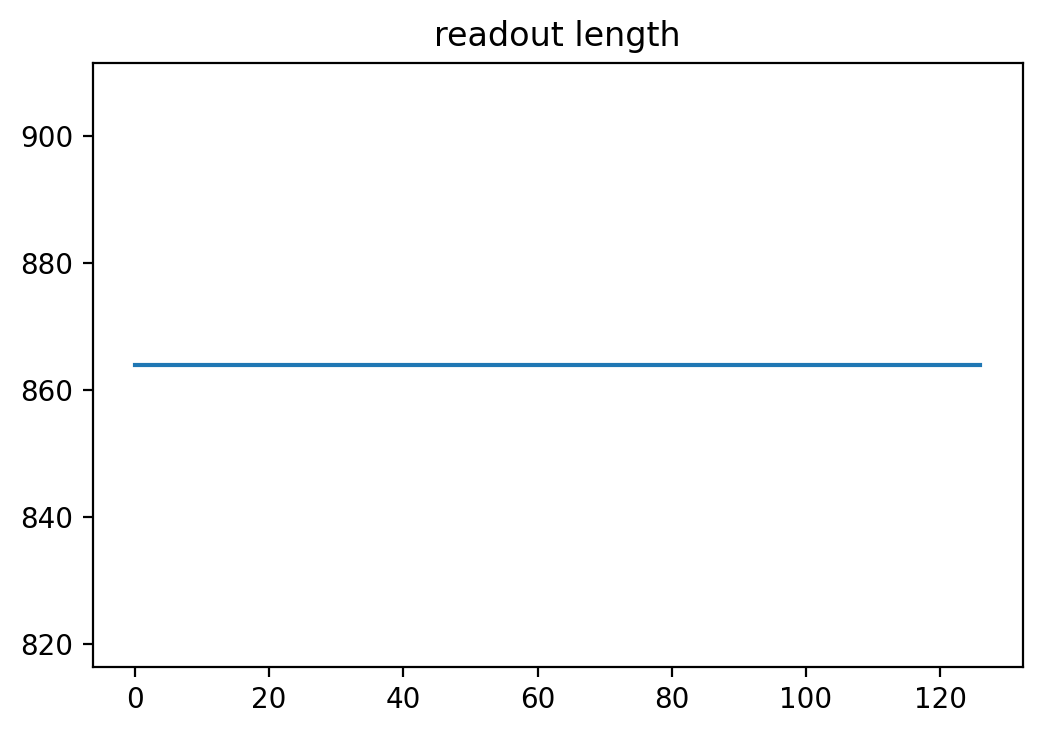

In [28]:
plt.clf()
plt.figure(dpi=200)
plt.plot(error_list[7], label="rel")
plt.title("readout length")

In [29]:
sx_error = []
for i in range(len(df_gates["parameters"])):
    if df_gates["gate"][i] == "sx":
        sx_error.append(df_gates["parameters"][i][0]["value"])

Text(0, 0.5, 'probability')

<Figure size 432x288 with 0 Axes>

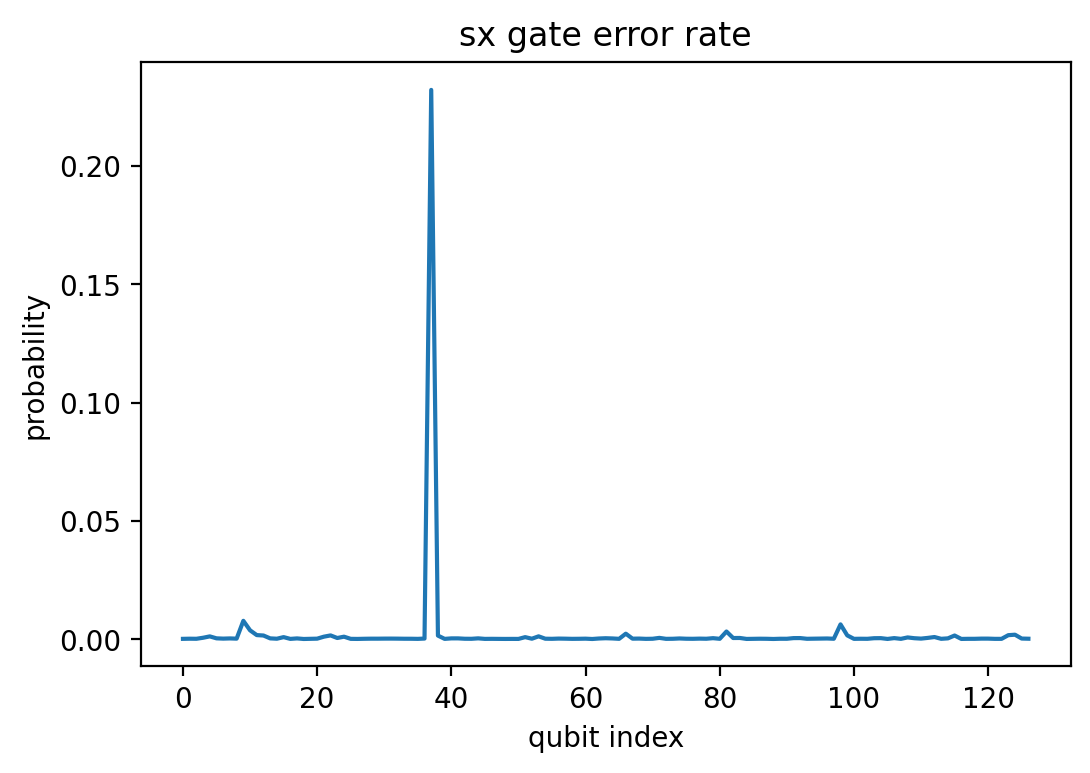

In [43]:
plt.clf()
plt.figure(dpi=200)
plt.plot(sx_error, label="sx error")
plt.title("sx gate error rate")
plt.xlabel("qubit index")
plt.ylabel("probability")

In [31]:
rz_error = []
for i in range(len(df_gates["parameters"])):
    if df_gates["gate"][i] == "rz":
        rz_error.append(df_gates["parameters"][i][0]["value"])

Text(0.5, 1.0, 'rz gate error rate')

<Figure size 432x288 with 0 Axes>

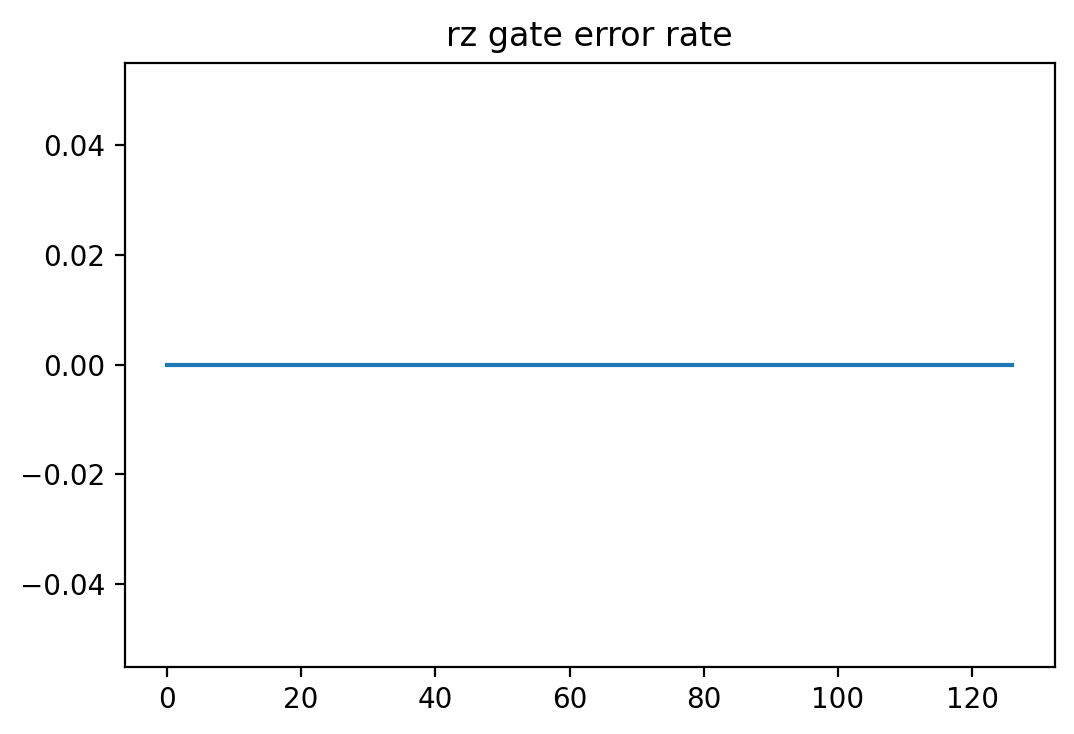

In [32]:
plt.clf()
plt.figure(dpi=200)
plt.plot(rz_error, label="rz error")
plt.title("rz gate error rate")

In [34]:
for i in range(len(df_gates["parameters"])):
    if df_gates["gate"][i] == "cx":
        print(df_gates["qubits"][i], df_gates["gate"][i], df_gates["parameters"][i][0]["value"])

[72, 62] cx 0.015827870584947668
[62, 72] cx 0.015827870584947668
[77, 71] cx 0.011954650995534194
[71, 77] cx 0.011954650995534194
[71, 58] cx 0.033644509968947495
[58, 71] cx 0.033644509968947495
[85, 73] cx 0.0066066254496136845
[73, 85] cx 0.0066066254496136845
[60, 61] cx 0.014901955586714338
[61, 60] cx 0.014901955586714338
[83, 84] cx 0.03370550407225248
[84, 83] cx 0.03370550407225248
[93, 106] cx 0.00745146027101376
[106, 93] cx 0.00745146027101376
[60, 59] cx 0.00960031169145839
[59, 60] cx 0.00960031169145839
[68, 69] cx 0.013629691881324152
[69, 68] cx 0.013629691881324152
[85, 86] cx 0.027764184557573846
[86, 85] cx 0.027764184557573846
[111, 104] cx 0.01380144785499976
[104, 111] cx 0.01380144785499976
[41, 53] cx 0.01962754828490698
[53, 41] cx 0.01962754828490698
[68, 67] cx 0.010084460727192018
[67, 68] cx 0.010084460727192018
[39, 33] cx 0.008825205749947801
[33, 39] cx 0.008825205749947801
[51, 50] cx 0.007744554882586491
[50, 51] cx 0.007744554882586491
[95, 94] cx 